# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [129]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [295]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT ProductName AS Prod
    FROM Products
    WHERE Price < 10
    Group By Price
""")

rows = cursor.fetchall()
print(rows)

[('Geitost',), ('Guaraná Fantástica',), ('Konbu',), ('Filo Mix',), ('Tourtière',), ('Rhönbräu Klosterbier',), ('Tunnbröd',), ('Teatime Chocolate Biscuits',), ('Røgede sild',), ("Jack's New England Clam Chowder",)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [314]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Count(supplierID), Country 
    FROM Suppliers
    GROUP BY Country
    ORDER BY Country DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(4, 'USA'), (2, 'UK'), (2, 'Sweden'), (1, 'Spain'), (1, 'Singapore'), (1, 'Norway'), (1, 'Netherlands'), (2, 'Japan'), (2, 'Italy'), (3, 'Germany'), (3, 'France'), (1, 'Finland'), (1, 'Denmark'), (2, 'Canada'), (1, 'Brazil'), (2, 'Australia')]


Text(0.5, 1.0, 'Supply Origin Sums by Country')

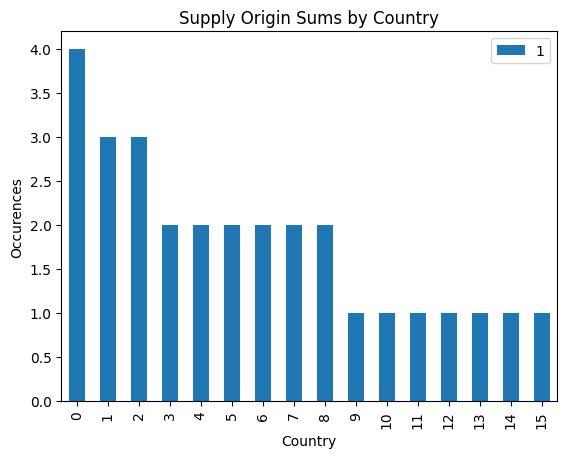

In [133]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows)



# TODO: Generate a visualization on this dataframe
df.plot.bar()
plt.xlabel('Country')
plt.ylabel('Occurences')
plt.title('Supply Origin Sums by Country')

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [328]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Count(CustomerID), Country 
    FROM Customers
    GROUP BY Country
    ORDER BY CustomerID DESC           
""")


# TODO: Fetch your list of tuples and print it out
customer_loc = cursor.fetchall()
print(customer_loc)


[(1, 'Poland'), (2, 'Finland'), (2, 'Denmark'), (1, 'Norway'), (2, 'Belgium'), (1, 'Ireland'), (4, 'Venezuela'), (13, 'USA'), (2, 'Portugal'), (3, 'Italy'), (2, 'Austria'), (9, 'Brazil'), (2, 'Switzerland'), (3, 'Argentina'), (3, 'Canada'), (5, 'Spain'), (11, 'France'), (2, 'Sweden'), (7, 'UK'), (5, 'Mexico'), (11, 'Germany')]


Text(0.5, 1.0, 'Most common customers by country')

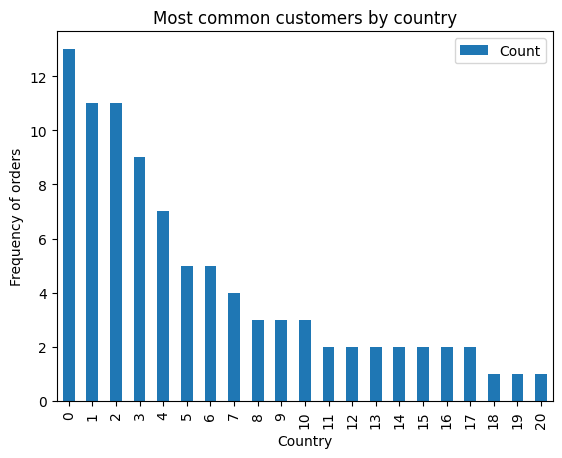

In [135]:
# TODO: Convert your list of tuples to a dataframe
df1 = pd.DataFrame(customer_loc, columns= ['country', 'Count'])
df1.head()
# TODO: Generate a visualization on this dataframe
df1.plot.bar()
plt.xlabel('Country')
plt.ylabel('Frequency of orders')
plt.title('Most common customers by country')

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [136]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT ProductName, Quantity
FROM Products AS Prod
INNER JOIN OrderDetails AS OD
ON Prod.ProductID = OD.ProductID
WHERE Quantity <= 4
ORDER BY Quantity ASC
 """);



# TODO: Fetch your list of tuples and print it out
Worse_prod= cursor.fetchall()
print(Worse_prod)

[('Gravad lax', 1), ('Teatime Chocolate Biscuits', 1), ('Gudbrandsdalsost', 1), ('Gnocchi di nonna Alice', 2), ('Ravioli Angelo', 2), ('Manjimup Dried Apples', 2), ('Fløtemysost', 2), ('Singaporean Hokkien Fried Mee', 2), ('Boston Crab Meat', 2), ('Alice Mutton', 2), ('Spegesild', 2), ('Konbu', 2), ('Gumbär Gummibärchen', 2), ('Mozzarella di Giovanni', 3), ('Scottish Longbreads', 3), ('Scottish Longbreads', 3), ('Fløtemysost', 3), ('Mozzarella di Giovanni', 4), ('Steeleye Stout', 4), ('Gnocchi di nonna Alice', 4), ('Rössle Sauerkraut', 4), ('NuNuCa Nuß-Nougat-Creme', 4), ('Chartreuse verte', 4), ('Gorgonzola Telino', 4), ('Scottish Longbreads', 4), ('Boston Crab Meat', 4), ('Thüringer Rostbratwurst', 4), ('Teatime Chocolate Biscuits', 4)]


In [137]:
# TODO: Convert your list of tuples to a dataframe
df2 = pd.DataFrame(Worse_prod, columns=['ProductName', 'Quantity'])

df2 


,ProductName,Quantity
0,Gravad lax,1
1,Teatime Chocolate Biscuits,1
2,Gudbrandsdalsost,1
3,Gnocchi di nonna Alice,2
4,Ravioli Angelo,2
5,Manjimup Dried Apples,2
6,Fløtemysost,2
7,Singaporean Hokkien Fried Mee,2
8,Boston Crab Meat,2
9,Alice Mutton,2


In [138]:
Viz = df2.head(21)

Viz

,ProductName,Quantity
0,Gravad lax,1
1,Teatime Chocolate Biscuits,1
2,Gudbrandsdalsost,1
3,Gnocchi di nonna Alice,2
4,Ravioli Angelo,2
5,Manjimup Dried Apples,2
6,Fløtemysost,2
7,Singaporean Hokkien Fried Mee,2
8,Boston Crab Meat,2
9,Alice Mutton,2


AttributeError: 'Axes' object has no attribute 'savefig'

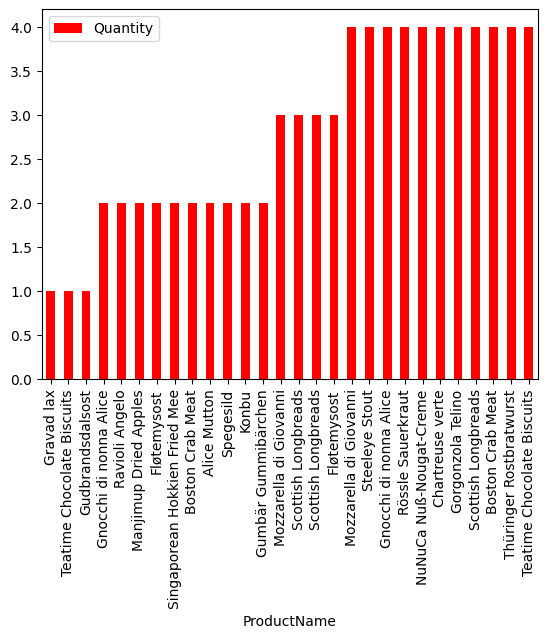

In [139]:
df2.plot.bar(x="ProductName", y="Quantity", color= 'red')

plt.xticks(rotation=90)
fig.savefig('Bottom 20')
fig.tight_layout()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT ProductName, Sum(quantity) * Price AS Total 
FROM  Products AS P 
Join OrderDetails as OD
ON P.ProductId = OD.ProductId 
Group By ProductName
Order By Total ASC                                     
""")


# TODO: Fetch your list of tuples and print it out
total_rev= cursor.fetchall()
print(total_rev)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.3500000000001), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.1999999999998), ('Spegesild', 1740), ('Longlife Tofu', 1860), ('Mishi Kobe Niku', 1940), ('Escargots de Bourgogne', 2053.75), ('Tourtière', 2086.0),

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df_rev= pd.DataFrame(total_rev, columns= ['ProductName', 'Total'])
df_rev




,ProductName,Total
0,Laughing Lumberjack Lager,70.00
1,Røgede sild,142.50
2,Filo Mix,336.00
3,Gustaf's Knäckebröd,378.00
4,Genen Shouyu,387.50
...,...,...
72,Camembert Pierrot,14620.00
73,Tarte au sucre,16022.50
74,Raclette Courdavault,19030.00
75,Thüringer Rostbratwurst,20796.72


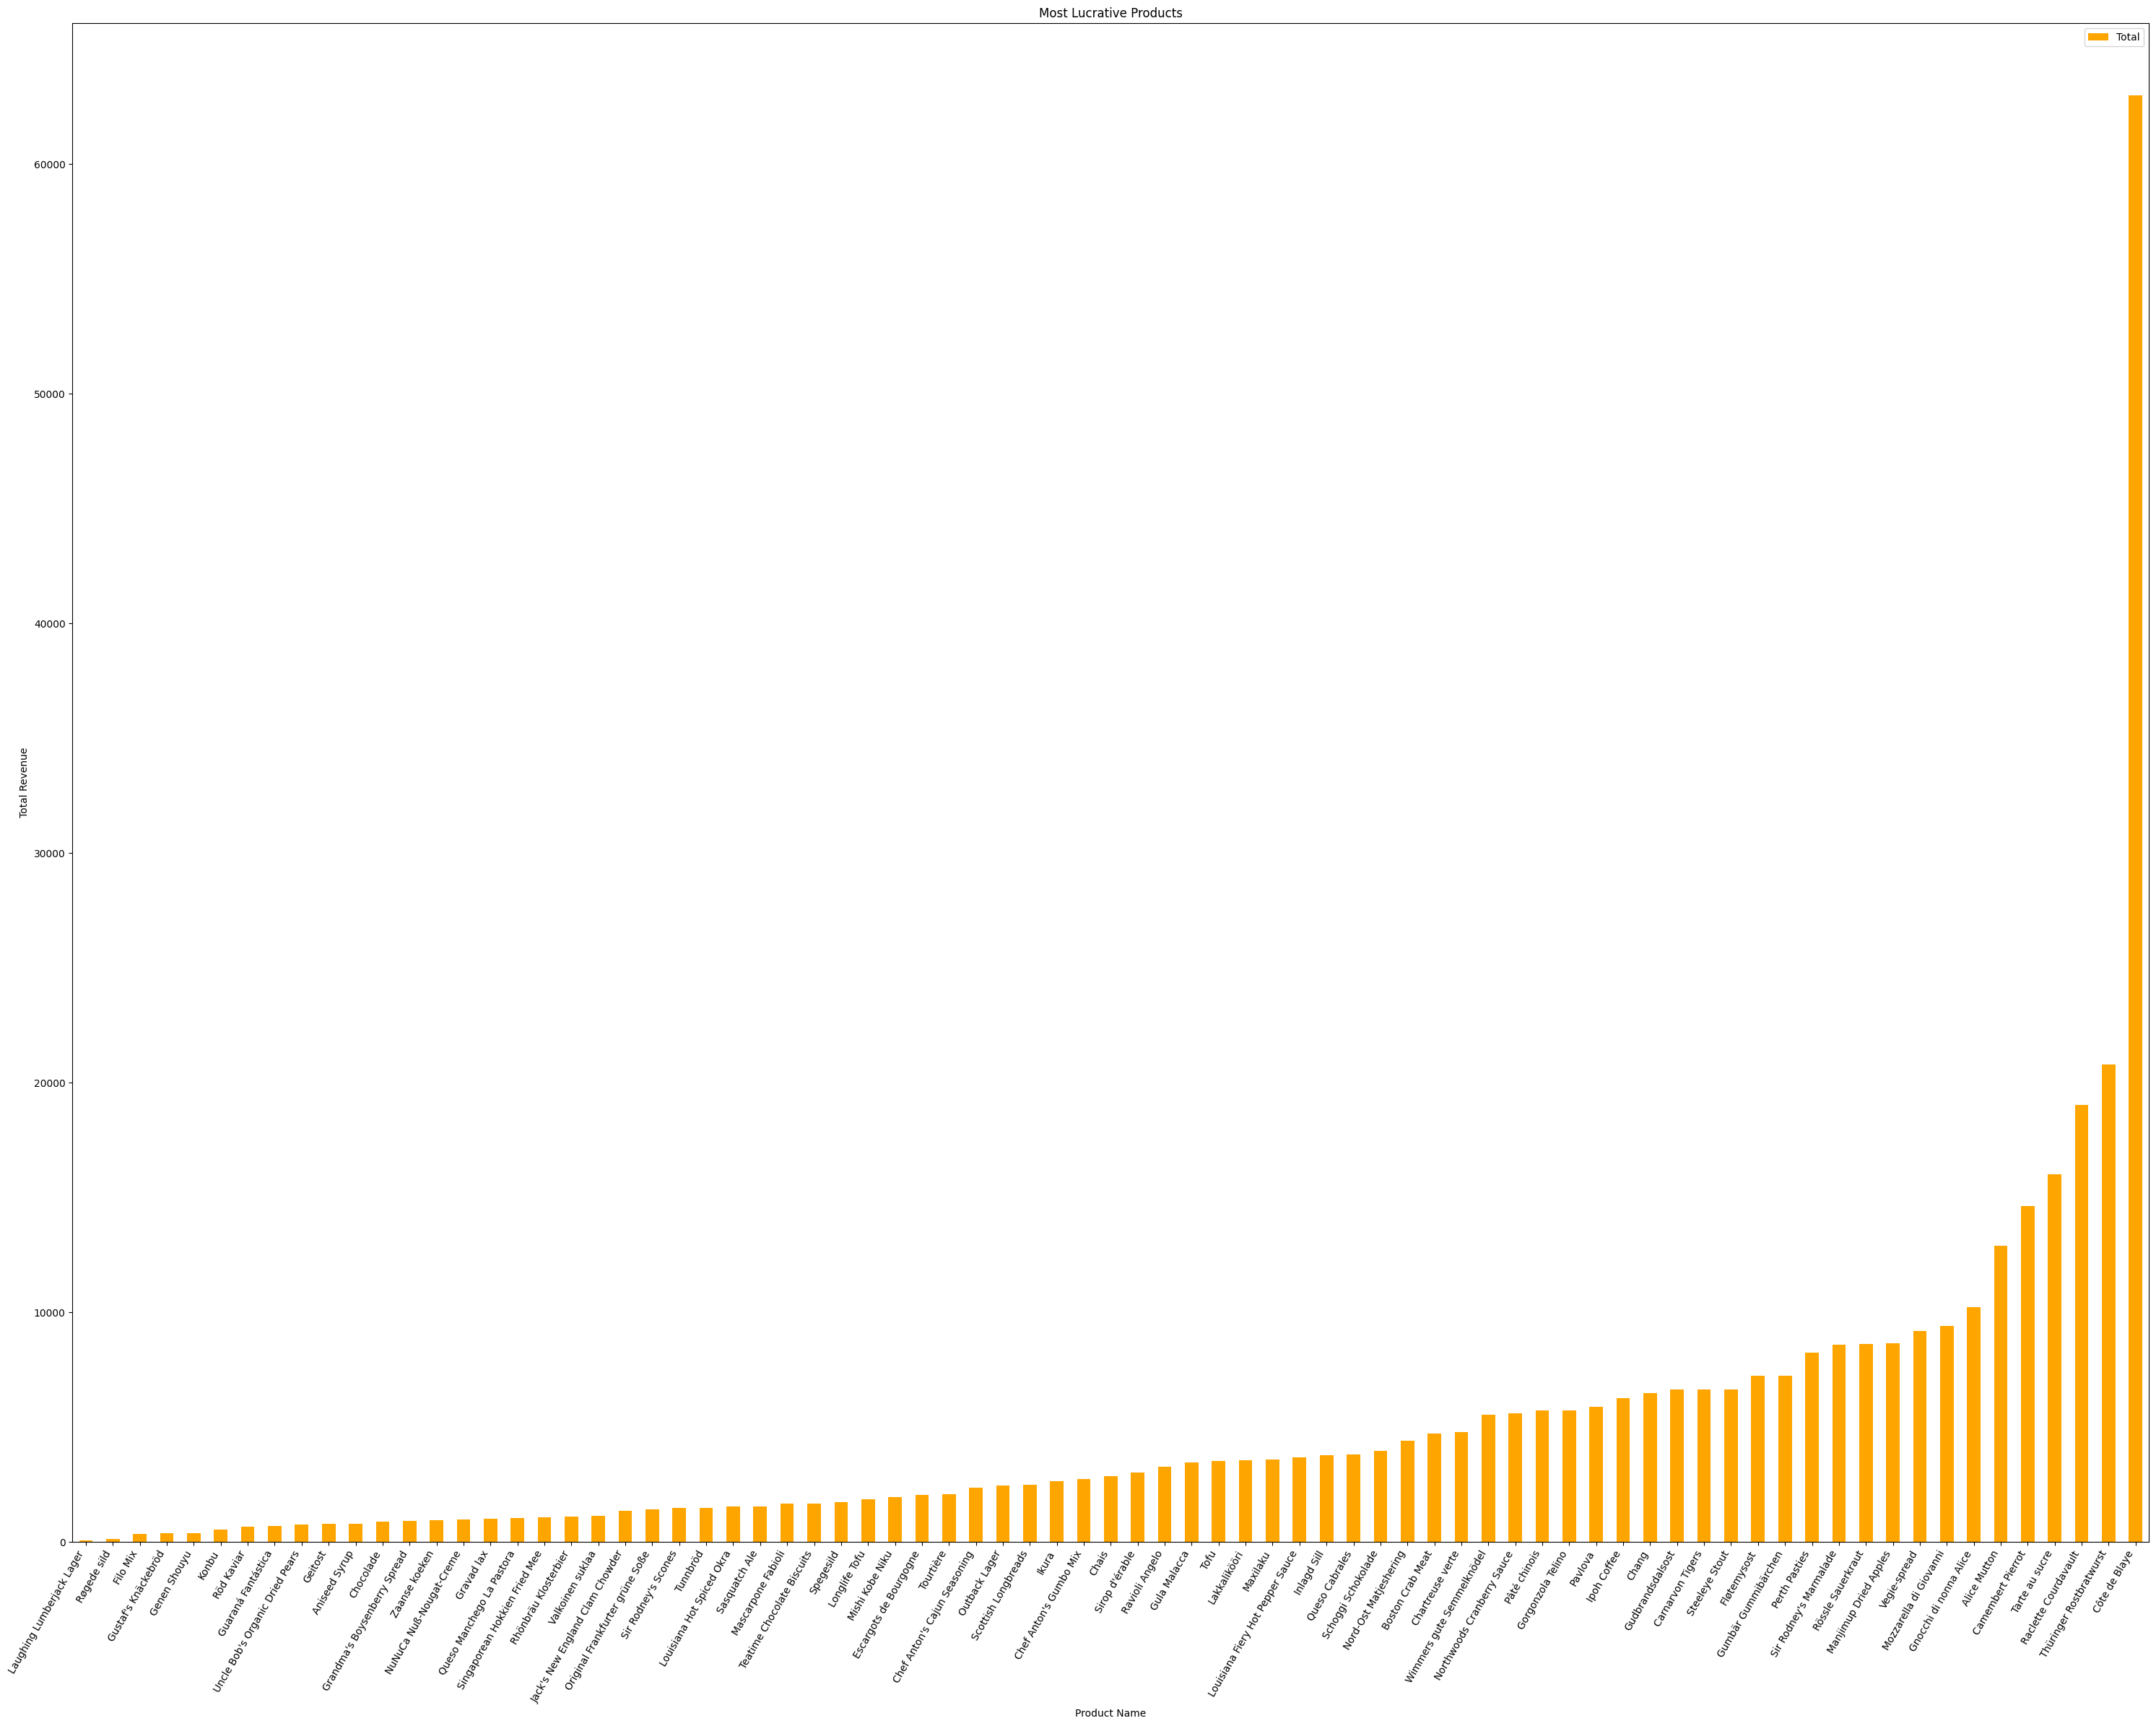

In [ ]:
# TODO: Generate a visualization on this dataframe
fig, ax = plt.subplots(figsize=(30, 24))  


df_rev.plot.bar(x='ProductName', y='Total', color='orange', ax=ax, legend=True)


plt.xticks(rotation=60, ha='right')  


ax.set_xlabel('Product Name')
ax.set_ylabel('Total Revenue')
ax.set_title('Most Lucrative Products')


plt.tight_layout()

plt.show()


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [169]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Customers.Country, COUNT(Orders.OrderID) AS OrderCount
FROM Customers
JOIN Orders ON Customers.CustomerID = Orders.CustomerID
GROUP BY Customers.Country
Order BY OrderCount ASC
""")

# TODO: Fetch your list of tuples and print it out
Best_Cust=cursor.fetchall()
print(Best_Cust)

[('Argentina', 1), ('Norway', 1), ('Poland', 1), ('Belgium', 2), ('Denmark', 4), ('Switzerland', 4), ('Portugal', 5), ('Ireland', 6), ('Italy', 7), ('Spain', 7), ('Sweden', 7), ('Finland', 8), ('Canada', 9), ('Mexico', 9), ('Venezuela', 9), ('UK', 12), ('Austria', 13), ('France', 18), ('Brazil', 19), ('Germany', 25), ('USA', 29)]


<Axes: xlabel='country'>

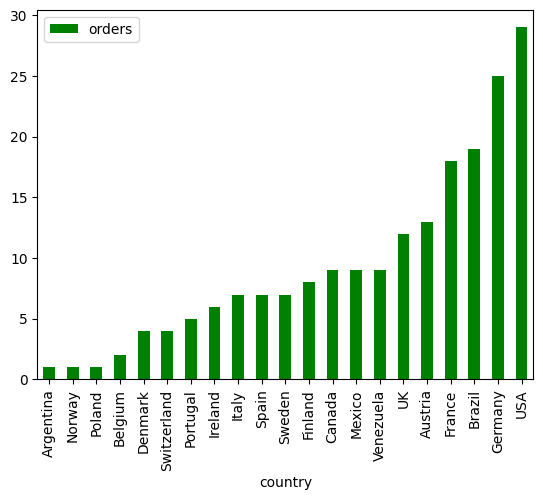

In [173]:
# TODO: Convert your list of tuples to a dataframe
df_Best = pd.DataFrame(Best_Cust, columns=['country', 'orders'] )
df_Best
# TODO: Generate a visualization on this dataframe
df_Best.plot.bar(x='country', y= 'orders', color= 'green')

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [239]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT COUNT(Customers.CustomerName) AS Null_cust_count,  Customers.Country
FROM Customers
Left Join Orders 
ON Customers.CustomerID = Orders.CustomerID 
Where Orders.CustomerID IS Null 
Group By Country
Order By Null_cust_count ASC
 """)

# TODO: Fetch your list of tuples and print it out
Null_vals = cursor.fetchall()
print(Null_vals)

[(1, 'Belgium'), (1, 'Canada'), (1, 'Spain'), (1, 'UK'), (2, 'Argentina'), (2, 'Germany'), (4, 'France'), (5, 'USA')]


In [240]:
#Checking my answer
cursor.execute("""
SELECT Customers.CustomerName,  Customers.Country
FROM Customers
Left Join Orders 
ON Customers.CustomerID = Orders.CustomerID 
Where Orders.CustomerID IS Null 
Order By Country
 """)

# TODO: Fetch your list of tuples and print it out
check_answer = cursor.fetchall()
print(check_answer)

[('Cactus Comidas para llevar', 'Argentina'), ('Rancho grande', 'Argentina'), ('Maison Dewey', 'Belgium'), ('Laughing Bacchus Wine Cellars', 'Canada'), ('France restauration', 'France'), ("La corne d''abondance", 'France'), ('Paris spécialités', 'France'), ('Spécialités du monde', 'France'), ('Alfreds Futterkiste', 'Germany'), ('Blauer See Delikatessen', 'Germany'), ('FISSA Fabrica Inter. Salchichas S.A.', 'Spain'), ('North/South', 'UK'), ('Great Lakes Food Market', 'USA'), ('Lazy K Kountry Store', 'USA'), ("Let''s Stop N Shop", 'USA'), ('The Cracker Box', 'USA'), ("Trail''s Head Gourmet Provisioners", 'USA')]


<Axes: xlabel='Country'>

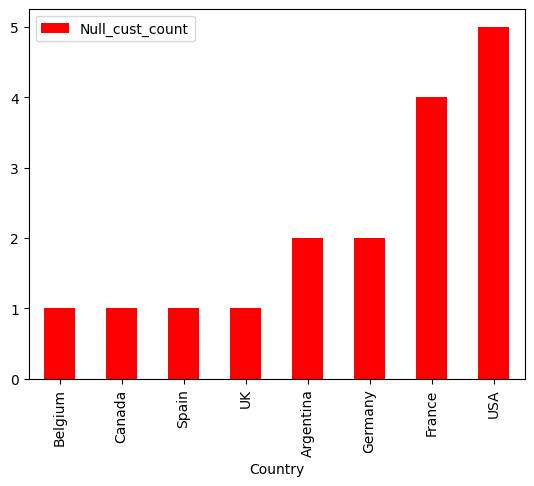

In [242]:
# TODO: Convert your list of tuples to a dataframe
Null_vals_df = pd.DataFrame(Null_vals, columns=['Null_cust_count', 'Country'])
Null_vals_df
# TODO: Generate a visualization on this dataframe
Null_vals_df.plot.bar(x='Country', y= 'Null_cust_count', color= 'red')


### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [261]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT COUNT(distinct OrderDetails.OrderID) AS Ordercount, S.SupplierName 
FROM Suppliers AS S
LEFT JOIN Products 
ON S.SupplierId = Products.SupplierID 
Left Join OrderDetails
ON OrderDetails.ProductID = Products.ProductID
Group By SupplierName
Order By Ordercount DESC 
""")

# TODO: Fetch your list of tuples and print it out
supplier_prod = cursor.fetchall()
supplier_prod

[(37, 'Plutzer Lebensmittelgroßmärkte AG'),
 (37, 'Pavlova, Ltd.'),
 (33, 'Specialty Biscuits, Ltd.'),
 (30, 'Norske Meierier'),
 (27, 'Formaggi Fortini s.r.l.'),
 (26, 'Gai pâturage'),
 (21, 'Exotic Liquid'),
 (20, 'Pasta Buttini s.r.l.'),
 (20, 'New Orleans Cajun Delights'),
 (19, 'Ma Maison'),
 (19, 'Karkki Oy'),
 (18, "G'day, Mate"),
 (17, 'New England Seafood Cannery'),
 (16, "Mayumi's"),
 (16, 'Leka Trading'),
 (16, 'Bigfoot Breweries'),
 (15, "Forêts d'érables"),
 (15, 'Aux joyeux ecclésiastiques'),
 (14, 'Heli Süßwaren GmbH & Co. KG'),
 (13, 'Svensk Sjöföda AB'),
 (12, 'Tokyo Traders'),
 (11, 'Refrescos Americanas LTDA'),
 (11, "Cooperativa de Quesos 'Las Cabras'"),
 (8, 'Nord-Ost-Fisch Handelsgesellschaft mbH'),
 (8, 'Lyngbysild'),
 (6, 'PB Knäckebröd AB'),
 (6, "Grandma Kelly's Homestead"),
 (4, 'Zaanse Snoepfabriek'),
 (4, 'Escargots Nouveaux')]

<Axes: xlabel='Supplier Name'>

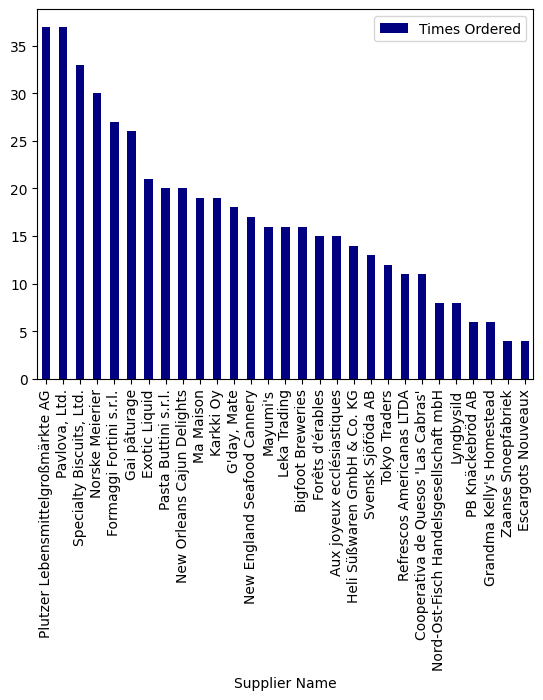

In [266]:
# TODO: Convert your list of tuples to a dataframe
df_supplier=pd.DataFrame(supplier_prod, columns=['Times Ordered', 'Supplier Name'])
df_supplier
# TODO: Generate a visualization on this dataframe
df_supplier.plot.bar(x= 'Supplier Name', y= 'Times Ordered', color='Navy' )

In [257]:
cursor.execute("""
SELECT *
FROM Orders
""")

excel_df= cursor.fetchall()
excel_df1= pd.DataFrame(data=excel_df)
excel_df1.to_csv('Orders.csv')

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

United States has 13 customers and Germany has 11. There is a correlation, both the US and Germany are also he biggest suppliers with 4 and 3 products respectively.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]

'Plutzer Lebensmittelgroßmärkte AG' and 'Pavlova, Ltd. each have 37 orders!